In [1]:
from data_processing import *
from kernels import *
from methods import *
from utils import *

In [2]:
Xtr, Xte, Ytr = load_data(data_dir="data")

Data loaded successfully
Xtr.shape: (5000, 3072)
Xte.shape: (2000, 3072)
Ytr.shape: (5000,)


In [3]:
std_Xtr, Xtr, Xte = normalize_data(Xtr, Xte)

Before scaling:
Overall mean: 0.00025552399643960884
Overall std: 0.036931775770682074

After scaling:
Xtr mean: 0.006918811541210917
Xtr std: 0.9999999999999999
Xte mean: 0.005958882871338162
Xte std: 0.9983245277147779

Values to save for later use:
mean_Xtr = 0.00025552399643960884
std_Xtr = 0.036931775770682074


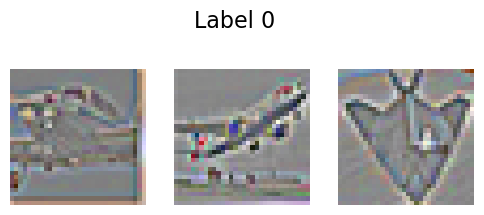

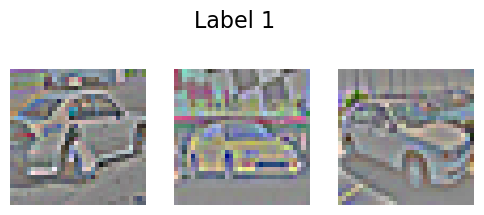

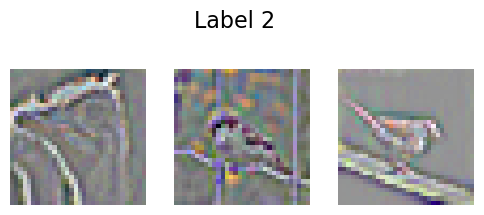

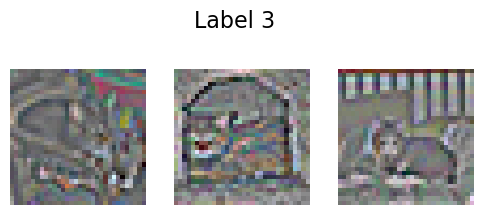

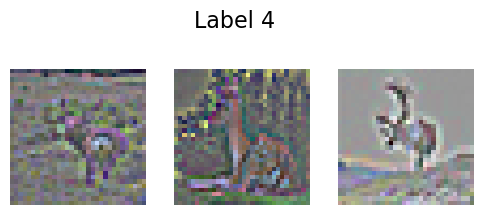

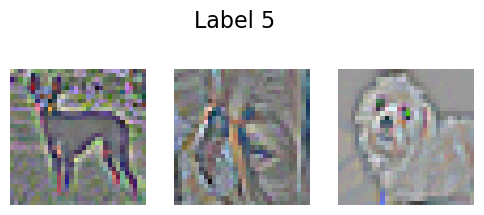

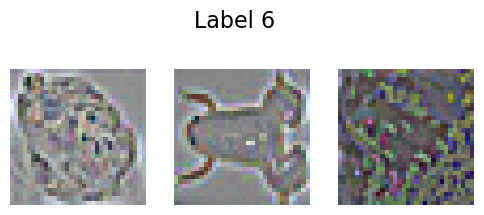

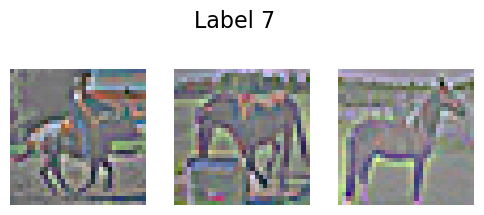

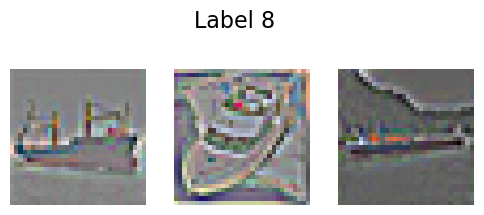

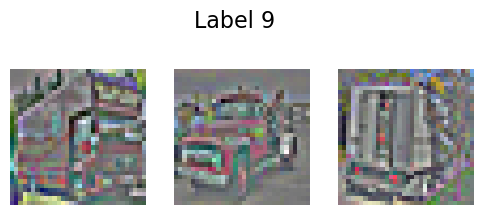


    Based on the visualization, the labels correspond to:

    - Label 0: plane
    - Label 1: car
    - Label 2: bird
    - Label 3: cat
    - Label 4: deer
    - Label 5: dog
    - Label 6: frog
    - Label 7: horse
    - Label 8: boat
    - Label 9: truck
    


In [4]:
show_images_per_label(Xtr, Ytr, n_per_label=3)

In [5]:
num_rows = Xte.shape[0]
random_predictions = np.random.randint(0, 10, size=num_rows)
create_submission(random_predictions, filename="submission.csv")

,Id,Prediction
0,1,9
1,2,3
2,3,7
3,4,4
4,5,9
...,...,...
1995,1996,0
1996,1997,9
1997,1998,1
1998,1999,1


In [12]:
# Compute the gram matrix for the training data
rbf_kernel = RBFKernel(sigma=50.0)
K_train = rbf_kernel(Xtr)
print("K_train.shape:", K_train.shape)

K_train.shape: (5000, 5000)


In [13]:
# Test case
# Split data into training and validation sets
Xtr_train, Ytr_train, Xtr_val, Ytr_val = split_train_test(Xtr, Ytr, test_size=0.2)

# Define solver
ridge_reg = RidgeRegression(rbf_kernel, lmda=0.1)
ridge_reg.fit(Xtr_train, Ytr_train, num_classes=10)

# Predict on the training set
Y_pred_train = ridge_reg.predict(Xtr_val)
print("Training accuracy: {:.2f}%".format(accuracy(Ytr_val, Y_pred_train, percentage=True)))

Training accuracy: 21.10%
